# Applied Data science Capstone: The Battle of Neighborhoods

## Best Neighborhood in Amsterdam

### 1-Introduction : Business Problem

In [5]:
import pandas as pd
import numpy as np

In [64]:
df=pd.read_csv("C:/Users/pc/Desktop/Coursera/Final Assignment_Capstone project/wijken_buurten.csv",delimiter=",")

In [65]:
df.head()

,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,nage_45_to_65,nage_65_older,nunmarried,nmarried,ndivorced,nwidowed,nimmigrant_western,nimmigrant_nonwestern,nimmigrant_marokko,nimmigrant_antiles_aruba,nimmigrant_surinam,nimmigrant_turkey,nimmigrant_other_non_western,nhouseholds,nhh_single_person,nhh_no_children,nhh_with_children,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
0,Amsterdam,Amsterdam,Gemeente,GM0363,833624,411608,422016,127224,108370,293154,204741,100135,531112,203974,73962,24576,140901,289823,75065,12227,66119,42622,93790,456462,251828,92709,111925,1.8,5042.0,21949,16533,5416,1.0,6011.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.879568,52.381000
1,Burgwallen-Oude Zijde,Amsterdam,Wijk,WK036300,4280,2340,1935,255,675,2030,980,355,3280,660,290,65,1275,640,25,40,80,40,455,3070,2160,655,265,1.4,12255.0,40,35,6,1.0,7619.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896943,52.372566
2,Kop Zeedijk,Amsterdam,Buurt,BU03630000,1020,570,445,50,140,520,260,60,765,175,70,15,320,145,5,10,20,10,105,740,520,170,55,1.4,16818.0,8,6,2,1.0,6649.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.900280,52.375937
3,Oude Kerk e.o.,Amsterdam,Buurt,BU03630001,670,365,300,30,130,320,145,55,540,70,55,15,205,105,5,10,15,10,70,500,370,95,45,1.3,7615.0,9,9,0,1.0,7361.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896156,52.373793
4,Burgwallen Oost,Amsterdam,Buurt,BU03630002,1610,880,730,120,250,755,340,155,1230,255,115,25,495,275,10,15,35,10,210,1120,770,260,105,1.4,25867.0,7,6,1,1.0,7544.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.898757,52.372815


In [73]:
df=df.drop(df.index[0])

In [77]:
amster = df[df['regio_type'] == 'Wijk'].reset_index(drop=True)
amster.head()

,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,nage_45_to_65,nage_65_older,nunmarried,nmarried,ndivorced,nwidowed,nimmigrant_western,nimmigrant_nonwestern,nimmigrant_marokko,nimmigrant_antiles_aruba,nimmigrant_surinam,nimmigrant_turkey,nimmigrant_other_non_western,nhouseholds,nhh_single_person,nhh_no_children,nhh_with_children,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
0,Burgwallen-Oude Zijde,Amsterdam,Wijk,WK036300,4280,2340,1935,255,675,2030,980,355,3280,660,290,65,1275,640,25,40,80,40,455,3070,2160,655,265,1.4,12255.0,40,35,6,1.0,7619.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896943,52.372566
1,Burgwallen-Nieuwe Zijde,Amsterdam,Wijk,WK036301,3960,2150,1805,220,595,2100,775,285,3140,545,245,35,1255,630,35,35,65,40,465,2900,2105,625,175,1.4,6935.0,73,57,16,1.0,9206.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.895518,52.375703
2,Grachtengordel-West,Amsterdam,Wijk,WK036302,6475,3415,3060,585,840,2215,1820,1030,4195,1725,420,150,2050,610,10,45,70,45,445,4200,2660,1030,520,1.5,14469.0,57,45,12,1.0,10577.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.886836,52.373709
3,Grachtengordel-Zuid,Amsterdam,Wijk,WK036303,5440,2960,2480,535,680,2095,1360,775,3605,1370,350,120,1550,625,20,35,70,70,435,3505,2260,785,470,1.5,10476.0,64,52,12,1.0,9136.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.893349,52.364821
4,Nieuwmarkt/Lastage,Amsterdam,Wijk,WK036304,9605,4990,4615,810,1200,3200,2960,1450,6380,2080,895,260,2490,1280,85,80,265,75,780,6325,4105,1360,865,1.5,13390.0,107,72,35,1.0,7025.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.905641,52.372436


In [78]:
amster.shape

(99, 37)

In [79]:
amster=amster[["subject","lon","lat","ninhabitants"]]

In [83]:
amster.head()

,subject,lon,lat,ninhabitants
0,Burgwallen-Oude Zijde,4.896943,52.372566,4280
1,Burgwallen-Nieuwe Zijde,4.895518,52.375703,3960
2,Grachtengordel-West,4.886836,52.373709,6475
3,Grachtengordel-Zuid,4.893349,52.364821,5440
4,Nieuwmarkt/Lastage,4.905641,52.372436,9605


In [81]:
amster_data=amster.rename({"subject":"Neighborhood","ninhabitants":"habitants"},axis=1)

In [82]:
amster_data.head()

,Neighborhood,lon,lat,habitants
0,Burgwallen-Oude Zijde,4.896943,52.372566,4280
1,Burgwallen-Nieuwe Zijde,4.895518,52.375703,3960
2,Grachtengordel-West,4.886836,52.373709,6475
3,Grachtengordel-Zuid,4.893349,52.364821,5440
4,Nieuwmarkt/Lastage,4.905641,52.372436,9605


In [24]:
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

In [86]:
address = 'AMSTERDAM,AM'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3116337, 4.9471091.


In [88]:
# create map of Amsterdam using latitude and longitude values
map_Amsterdam= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lon in zip(amster_data['lat'], amster_data['lon']):
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Amsterdam)  
    
map_Amsterdam

In [33]:
CLIENT_ID = 'NCAIFWZAXGOLN1R1IVF4C3JUP1CK42TU2440CAJKST1OVXKJ' # your Foursquare ID
CLIENT_SECRET = 'AHNILBWUGPXLVC0UQ0YRXB1VF2XZBISWY0SHTVZ2BXSOK55P' # your Foursquare Secret
VERSION = '20201219' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NCAIFWZAXGOLN1R1IVF4C3JUP1CK42TU2440CAJKST1OVXKJ
CLIENT_SECRET:AHNILBWUGPXLVC0UQ0YRXB1VF2XZBISWY0SHTVZ2BXSOK55P


In [89]:
neighborhood_latitude = amster_data.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = amster_data.loc[0, 'lon'] # neighborhood longitude value

neighborhood_name = amster_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Burgwallen-Oude Zijde are 52.3725658613947, 4.8969427210672904.


In [44]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [90]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NCAIFWZAXGOLN1R1IVF4C3JUP1CK42TU2440CAJKST1OVXKJ&client_secret=AHNILBWUGPXLVC0UQ0YRXB1VF2XZBISWY0SHTVZ2BXSOK55P&v=20201219&ll=52.3725658613947,4.8969427210672904&radius=500&limit=100'

In [91]:
results = requests.get(url).json()

In [93]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [94]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-94-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Rosalia's Menagerie,Cocktail Bar,52.371678,4.899174
1,De Koffieschenkerij,Coffee Shop,52.374043,4.898427
2,Sofitel Legend The Grand Amsterdam,Hotel,52.371093,4.895410
3,Wynand Fockink,Liquor Store,52.372301,4.895253
4,De Bijenkorf,Department Store,52.373753,4.895271


In [95]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [96]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [97]:
amsterdam_venues = getNearbyVenues(names=amster_data['Neighborhood'],
                                   latitudes=amster_data['lat'],
                                   longitudes=amster_data['lon']
                                  )

Burgwallen-Oude Zijde
Burgwallen-Nieuwe Zijde
Grachtengordel-West
Grachtengordel-Zuid
Nieuwmarkt/Lastage
Haarlemmerbuurt
Jordaan
De Weteringschans
Weesperbuurt/Plantage
Oostelijke Eilanden/Kadijken
Westelijk Havengebied
Bedrijventerrein Sloterdijk
Houthavens
Spaarndammer- en Zeeheldenbuurt
Staatsliedenbuurt
Centrale Markt
Frederik Hendrikbuurt
Da Costabuurt
Kinkerbuurt
Van Lennepbuurt
Helmersbuurt
Overtoomse Sluis
Vondelbuurt
Zuidas
Oude Pijp
Nieuwe Pijp
Zuid Pijp
Weesperzijde
Oosterparkbuurt
Dapperbuurt
Transvaalbuurt
Indische Buurt West
Indische Buurt Oost
Oostelijk Havengebied
Zeeburgereiland/Nieuwe Diep
IJburg West
Sloterdijk
Landlust
Erasmuspark
De Kolenkit
Geuzenbuurt
Van Galenbuurt
Hoofdweg e.o.
Westindische Buurt
Hoofddorppleinbuurt
Schinkelbuurt
Willemspark
Museumkwartier
Stadionbuurt
Apollobuurt
IJburg Oost
IJburg Zuid
Scheldebuurt
IJselbuurt
Rijnbuurt
Frankendael
Middenmeer
Betondorp
Omval/Overamstel
Prinses Irenebuurt e.o.
Volewijck
IJplein/Vogelbuurt
Tuindorp Nieuwendam
Tu

In [98]:
print('There are {} uniques categories.'.format(len(amsterdam_venues['Venue Category'].unique())))

There are 293 uniques categories.


In [113]:
amsterdam_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Burgwallen-Oude Zijde,52.372566,4.896943,Rosalia's Menagerie,52.371678,4.899174,Cocktail Bar
1,Burgwallen-Oude Zijde,52.372566,4.896943,De Koffieschenkerij,52.374043,4.898427,Coffee Shop
2,Burgwallen-Oude Zijde,52.372566,4.896943,Sofitel Legend The Grand Amsterdam,52.371093,4.895410,Hotel
3,Burgwallen-Oude Zijde,52.372566,4.896943,Wynand Fockink,52.372301,4.895253,Liquor Store
4,Burgwallen-Oude Zijde,52.372566,4.896943,De Bijenkorf,52.373753,4.895271,Department Store


### Clustering Neighborhoods

In [112]:
amsterdam_venues['Venue Category'].value_counts

<bound method IndexOpsMixin.value_counts of 0                          Cocktail Bar
1                           Coffee Shop
2                                 Hotel
3                          Liquor Store
4                      Department Store
5                    Salon / Barbershop
6                  Marijuana Dispensary
7                             Bookstore
8                                Church
9                                 Hotel
10                    French Restaurant
11                           Restaurant
12                                Plaza
13                          Music Venue
14                          Snack Place
15                             Boutique
16                                Plaza
17                   Seafood Restaurant
18                                  Bar
19                          Cheese Shop
20                                 Café
21                            Roof Deck
22                        Deli / Bodega
23                          Coffee S

In [116]:
# one hot encoding
amsterdam_onehot = pd.get_dummies(amsterdam_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
amsterdam_onehot['Neighborhood'] = amsterdam_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [amsterdam_onehot.columns[-1]] + list(amsterdam_onehot.columns[:-1])
amsterdam_onehot = amsterdam_onehot[fixed_columns]

amsterdam_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Library,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Repair,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game 

In [117]:
amsterdam_onehot.shape

(3202, 293)

In [118]:
amsterdam_grouped = amsterdam_onehot.groupby('Neighborhood').mean().reset_index()
amsterdam_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Campground,Canal,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dutch Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Library,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Rest Area,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Repair,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game 

In [120]:
num_top_venues = 5

for hood in amsterdam_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = amsterdam_grouped[amsterdam_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amstel III/Bullewijk----
                    venue  freq
0  Furniture / Home Store  0.19
1       Electronics Store  0.12
2              Restaurant  0.12
3                Building  0.06
4     Rental Car Location  0.06


----Apollobuurt----
            venue  freq
0           Hotel  0.16
1     Bridal Shop  0.05
2       Juice Bar  0.05
3            Café  0.05
4  Breakfast Spot  0.05


----Banne Buiksloot----
                venue  freq
0            Bus Stop  0.22
1                Park  0.22
2  Turkish Restaurant  0.11
3       Shopping Mall  0.11
4          Restaurant  0.11


----Bedrijventerrein Sloterdijk----
                 venue  freq
0      Motorcycle Shop   0.4
1      Automotive Shop   0.2
2        Auto Workshop   0.2
3  Rental Car Location   0.2
4          Zoo Exhibit   0.0


----Betondorp----
             venue  freq
0              Bar  0.50
1           Bakery  0.17
2           Market  0.17
3  Organic Grocery  0.00
4     Optical Shop  0.00


----Bijlmer Centrum (D,F,H)----
   

In [125]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [176]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = amsterdam_grouped['Neighborhood']

for ind in np.arange(amsterdam_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(amsterdam_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amstel III/Bullewijk,Furniture / Home Store,Electronics Store,Restaurant,Gym,Fried Chicken Joint,Rental Car Location,Bistro,Asian Restaurant,Intersection,Coffee Shop
1,Apollobuurt,Hotel,Health Food Store,Baby Store,Café,Italian Restaurant,Bistro,Comedy Club,Steakhouse,Arts & Crafts Store,Bus Stop
2,Banne Buiksloot,Park,Bus Stop,Restaurant,Supermarket,Shopping Mall,Turkish Restaurant,Bakery,Zoo,Ethiopian Restaurant,Dutch Restaurant
3,Bedrijventerrein Sloterdijk,Motorcycle Shop,Automotive Shop,Auto Workshop,Rental Car Location,Zoo,Event Space,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant
4,Betondorp,Bar,Bakery,Market,Zoo,Falafel Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit


In [137]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [139]:
amsterdam_grouped_clustering = amsterdam_grouped.drop('Neighborhood', 1)

In [134]:
 sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(amsterdam_grouped_clustering)
    sse.append(kmeans.inertia_)
      
      

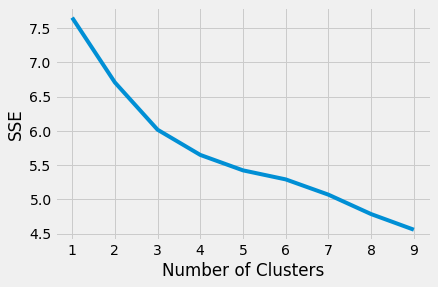

In [138]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [140]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(amsterdam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [177]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

amsterdam_merged = amster_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
amsterdam_merged = amsterdam_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [178]:
amsterdam_merged.head()

,Neighborhood,lon,lat,habitants,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burgwallen-Oude Zijde,4.896943,52.372566,4280,1.0,Hotel,Bar,Coffee Shop,French Restaurant,Cheese Shop,Sandwich Place,Clothing Store,Marijuana Dispensary,Thai Restaurant,Breakfast Spot
1,Burgwallen-Nieuwe Zijde,4.895518,52.375703,3960,1.0,Bar,Hotel,Coffee Shop,French Restaurant,Marijuana Dispensary,Café,Restaurant,Cheese Shop,Pub,Church
2,Grachtengordel-West,4.886836,52.373709,6475,1.0,Hotel,Bar,Café,French Restaurant,Coffee Shop,Marijuana Dispensary,Sandwich Place,Art Museum,Art Gallery,Clothing Store
3,Grachtengordel-Zuid,4.893349,52.364821,5440,1.0,Hotel,Coffee Shop,Sandwich Place,Restaurant,Italian Restaurant,Café,Marijuana Dispensary,Multiplex,Plaza,Clothing Store
4,Nieuwmarkt/Lastage,4.905641,52.372436,9605,1.0,Bar,Hotel,Hostel,Coffee Shop,Grocery Store,Bed & Breakfast,Cocktail Bar,Restaurant,Pizza Place,Bike Rental / Bike Share


In [181]:
amsterdam_merged=amsterdam_merged.dropna(axis='index',how='any')

In [157]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [182]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(amsterdam_merged['lat'], amsterdam_merged['lon'], amsterdam_merged['Neighborhood'], amsterdam_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyze Clusters

In [185]:
first=amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 0, amsterdam_merged.columns[[1] + list(range(5, amsterdam_merged.shape[1]))]]["1st Most Common Venue"]
first.value_counts()

Park    1
Name: 1st Most Common Venue, dtype: int64

In [186]:
second=amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 1, amsterdam_merged.columns[[1] + list(range(5, amsterdam_merged.shape[1]))]]["1st Most Common Venue"]
second.value_counts()

Restaurant                11
Bar                        9
Hotel                      7
Coffee Shop                5
Park                       4
Bakery                     3
Supermarket                3
Furniture / Home Store     2
Italian Restaurant         2
Clothing Store             2
Café                       2
Tram Station               2
Metro Station              2
Turkish Restaurant         2
Pizza Place                2
French Restaurant          2
Ice Cream Shop             1
Ethiopian Restaurant       1
Zoo Exhibit                1
Breakfast Spot             1
Garden                     1
Tennis Court               1
Caribbean Restaurant       1
Market                     1
Soccer Field               1
Electronics Store          1
Brewery                    1
Indonesian Restaurant      1
History Museum             1
Motorcycle Shop            1
Salad Place                1
Coworking Space            1
Chinese Restaurant         1
Gym / Fitness Center       1
Fast Food Rest

In [187]:
third=amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 2, amsterdam_merged.columns[[1] + list(range(5, amsterdam_merged.shape[1]))]]["1st Most Common Venue"]
third.value_counts()

Bus Stop                6
Supermarket             1
Bar                     1
Soccer Field            1
Harbor / Marina         1
Gym / Fitness Center    1
Asian Restaurant        1
Beach                   1
Convenience Store       1
Park                    1
Restaurant              1
Name: 1st Most Common Venue, dtype: int64